# Logistic regression

 Logistic Regression is one of the popular type of classification techniques

 Logistic Regression can also solve multi-classification problems like whether it belongs to category A, B, C or D.

Logistic regression is generally used where the dependent variable is Binary or Dichotomous. That means the dependent variable can take only two possible values such as “Yes or No”, “Default or No Default”, “Living or Dead”, “Responder or Non Responder”, “Yes or No” etc. Independent factors or variables can be categorical or numerical variables.

Please note that even though logistic (logit) regression is frequently used for binary variables (2 classes), it can be used for categorical dependent variables with more than 2 classes. In this case it’s called Multinomial Logistic Regression

![alt text](https://i.stack.imgur.com/rhVmk.jpg)

-sigmoid function is used in logistic regression

### -the y value in the linear regression formula is replaced by the sigmoid function in the logistic regression

![alt text](https://raw.githubusercontent.com/praneethmetuku/file/master/logis.PNG)

We cannot use a linear regression to model a binary response, because the predicted values of  yy  will not be limited to 0 or 1. Instead of  yy , we could model probability of  yy , but even then, the predicted values cannot be limited to values between 0 and 1. Also, the relationship is not linear, but sigmoidal or S-shaped. In such cases, a function of the probability is used. The most frequently used is the logit function which is the natural log of the odds of success.

![alt text](https://refactored.ai/user/rf385/files/images/logistic_regression.png)

###  <font color='green'>To evaluate the logistic model(to see the accuracy of predicted classificatio) we use CONFUSION MATRIX</font>

![alt text](https://raw.githubusercontent.com/praneethmetuku/file/master/log1.PNG)

![alt text](https://raw.githubusercontent.com/praneethmetuku/file/master/log4.PNG)

###  <font color='green'>we will predict the accuracy of the model by adding true positives and true negatives</font>

![alt text](https://raw.githubusercontent.com/praneethmetuku/file/master/log2.PNG)

### we find the error rate we will add false negatives and false positives

![alt text](https://raw.githubusercontent.com/praneethmetuku/file/master/log3.PNG)

# Example:1 Titanic dataset

###  In this example we'll be trying to predict a classification- survival or deceased

### Step1: load the import statements

In [416]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Step2: Loading and analyzing the dataset and removing missing values

here to make simple example we already divided data into train and test dataset

-https://www.kaggle.com/c/titanic

In [417]:
train=pd.read_csv('https://raw.githubusercontent.com/praneethmetuku/file/master/titanic_train.csv')
test=pd.read_csv('https://raw.githubusercontent.com/praneethmetuku/file/master/titanic_test.csv')

In [418]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [419]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [420]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

### here we have null values in age,cabin and embarked columns

In [421]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Replacing 177 missing values in age column with avg age

In [422]:
avg=train["Age"].mean()
train['Age'].fillna(value=avg,inplace=True)

In [423]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### We will drop the cabin column since it has many missing values

In [424]:
train.drop('Cabin',axis=1,inplace=True)

In [425]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

### we will drop the missing values in embarked column since it has only 2 missing values

In [426]:
train.dropna(inplace=True)

In [427]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

### Step3:- visualizing the dataset

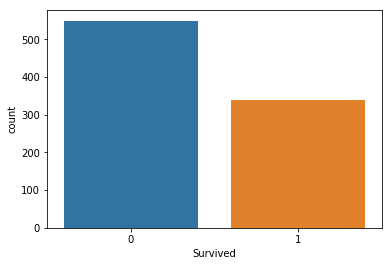

In [428]:
sns.countplot('Survived',data=train)

### most of them are not survived :(

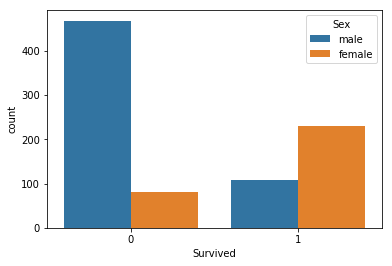

In [429]:
sns.countplot('Survived',data=train,hue='Sex')

### oops! most males are not survived

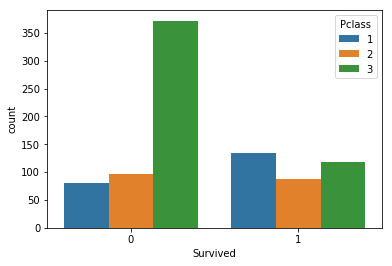

In [430]:
sns.countplot('Survived',data=train,hue='Pclass')

### As expected pclass of 3 has most non-survivals

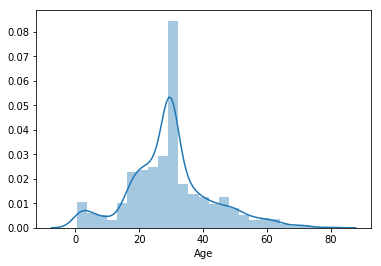

In [431]:
sns.distplot(train['Age'].dropna(),bins=25)

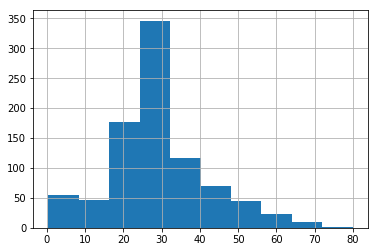

In [432]:
train['Age'].hist()

### Step-4 categorical values

In [433]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### SEx and embarked is a categorical values

In [434]:
sex_cat=pd.get_dummies(train['Sex'],drop_first=True) #drop_first is used to prevent dummy variable trap(multi collinearity)
sex_cat

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [435]:
Embarked_cat=pd.get_dummies(train['Embarked'],drop_first=True)
Embarked_cat

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [436]:
train['sex_cat']=sex_cat


In [437]:
train[['Q','S']]=Embarked_cat

In [438]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex_cat,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


### Removing unwanted columns

In [439]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [440]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex_cat,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [441]:
y=train['Survived']
x=train[['PassengerId','Pclass','Age','SibSp','Parch','Fare','sex_cat','Q','S']]

In [442]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,sex_cat,Q,S
0,1,3,22.000000,1,0,7.2500,1,0,1
1,2,1,38.000000,1,0,71.2833,0,0,0
2,3,3,26.000000,0,0,7.9250,0,0,1
3,4,1,35.000000,1,0,53.1000,0,0,1
4,5,3,35.000000,0,0,8.0500,1,0,1
5,6,3,29.699118,0,0,8.4583,1,1,0
6,7,1,54.000000,0,0,51.8625,1,0,1
7,8,3,2.000000,3,1,21.0750,1,0,1
8,9,3,27.000000,0,2,11.1333,0,0,1
9,10,2,14.000000,1,0,30.0708,0,0,0


# here will consider train data as the total data set 

# Step-5 spliting data into train and test datasets and feature scaling

In [443]:
from sklearn.model_selection import train_test_split

In [444]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [445]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()

In [446]:
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

# Step-6 Fitting the training dataset

In [447]:
from sklearn.linear_model import LogisticRegression

In [448]:
lr=LogisticRegression()

In [449]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Step-7 Predicting the test values

In [450]:
y_predict=lr.predict(x_test)

In [451]:
y_predict

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1], dtype=int64)

# Example:-2 Socai_ads.csv dataset

## Step1:- loading the import statements

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Step2:-import ,load and analyze  the dataset

In [10]:
data=pd.read_csv('https://raw.githubusercontent.com/praneethmetuku/file/master/Social_Network_Ads.csv')

### in this data set will see whether the user will PURSCHASE or not

In [6]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
data.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [8]:
data.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [9]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Step-3 visualize the dataset:-

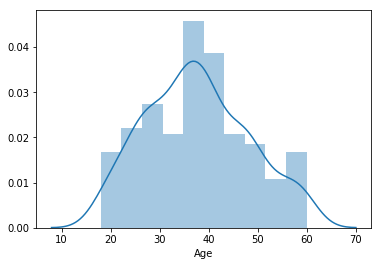

In [14]:
sns.distplot(data['Age'])

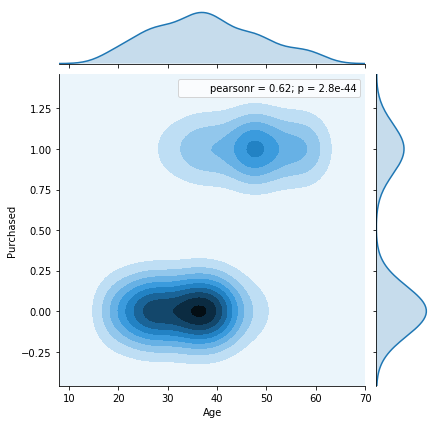

In [18]:
sns.jointplot(x='Age',y='Purchased',data=data,kind='kde')

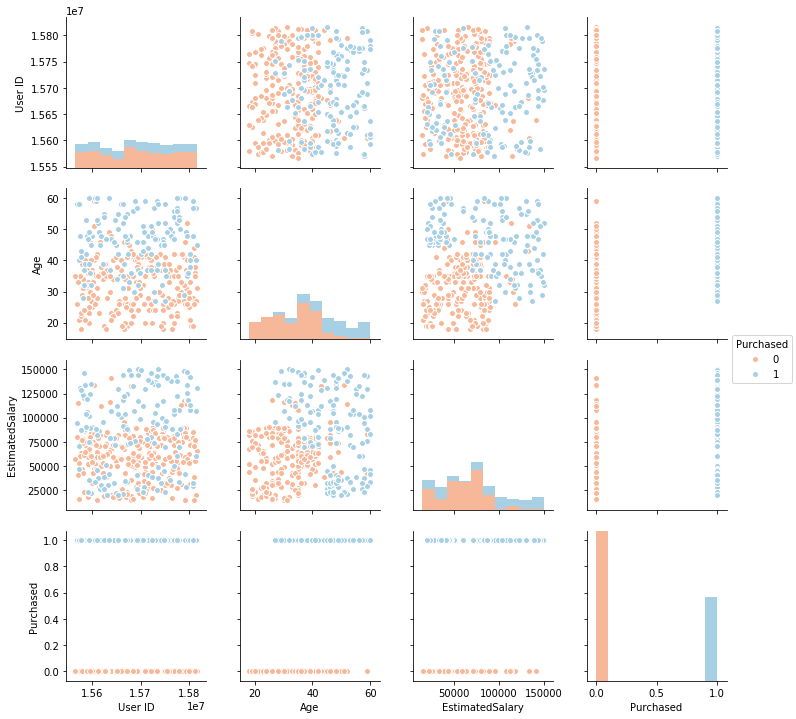

In [23]:
sns.pairplot(data,hue='Purchased',palette='RdBu')

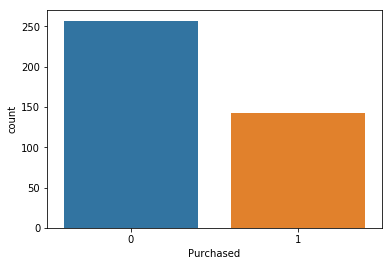

In [25]:
sns.countplot(data['Purchased'])

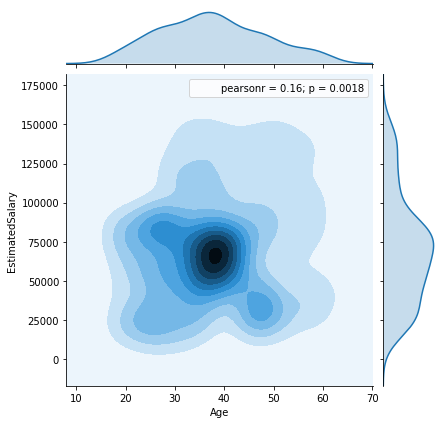

In [29]:
sns.jointplot(x='Age',y='EstimatedSalary',data=data,kind='kde')

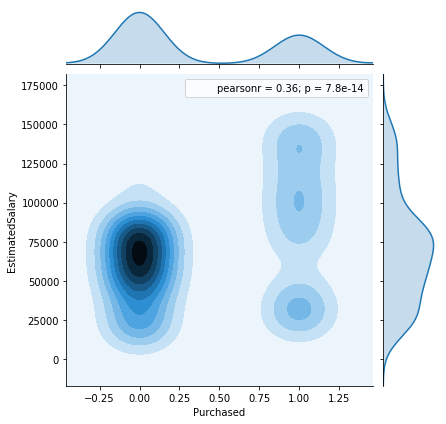

In [30]:
sns.jointplot(x='Purchased',y='EstimatedSalary',data=data,kind='kde')

## Step-4 splitting data into training and test datasets

In [31]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [33]:
x=data[['Age','EstimatedSalary']]
y=data['Purchased']

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=101)

In [49]:
x_train

,Age,EstimatedSalary
322,41,52000
377,42,53000
78,28,87000
124,41,51000
231,39,42000
265,42,108000
60,27,20000
288,41,79000
204,58,101000
252,48,134000


In [50]:
x_test  

,Age,EstimatedSalary
38,26,72000
387,39,71000
270,43,133000
181,31,71000
195,34,43000
201,49,74000
133,21,68000
118,40,59000
189,28,32000
165,18,86000


## Step-5 Feature Scaling(compulsory for classification models)

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [52]:
x_train=sc.fit_transform(x_train)

In [53]:
x_test=sc.fit_transform(x_test)

In [54]:
x_train

array([[ 2.88358578e-01, -5.06119366e-01],
       [ 3.84598705e-01, -4.75899893e-01],
       [-9.62763081e-01,  5.51562183e-01],
       [ 2.88358578e-01, -5.36338839e-01],
       [ 9.58783226e-02, -8.08314095e-01],
       [ 3.84598705e-01,  1.18617111e+00],
       [-1.05900321e+00, -1.47314250e+00],
       [ 2.88358578e-01,  3.09806400e-01],
       [ 1.92444075e+00,  9.74634802e-01],
       [ 9.62039471e-01,  1.97187741e+00],
       [-9.62763081e-01, -4.15460948e-01],
       [ 1.92118450e-01, -3.55022002e-01],
       [ 1.34699998e+00,  2.45538897e+00],
       [-2.89082188e-01, -2.34144111e-01],
       [-1.15524334e+00, -1.17094777e+00],
       [ 3.84598705e-01,  1.28489563e-01],
       [ 1.92118450e-01, -1.13266220e-01],
       [-6.74042698e-01, -1.53358144e+00],
       [-9.66019325e-02,  2.79586927e-01],
       [ 7.69559215e-01,  5.81781655e-01],
       [ 1.34699998e+00, -9.29191986e-01],
       [-9.62763081e-01, -7.47875149e-01],
       [ 2.02068087e+00, -8.08314095e-01],
       [-5.

## Step-6 Fitting the training dataset

In [55]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Step-7 Predicting the test dataset and classificationreport,confusion matrix

In [56]:
y_predtest=lr.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predtest)
cm

array([[80, 10],
       [12, 32]], dtype=int64)

In [69]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_predtest)
print(cr)

             precision    recall  f1-score   support

          0       0.87      0.89      0.88        90
          1       0.76      0.73      0.74        44

avg / total       0.83      0.84      0.83       134



### Roc curve( Receiver Operating Characteristic)[OPTIONAL]

In [112]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predtest)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.90625

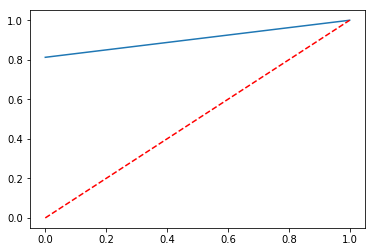

In [113]:
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')

# Example-3 Emailoffers.csv dataset

simple dataset where we predict who took the action

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [115]:
data=pd.read_csv('https://raw.githubusercontent.com/praneethmetuku/file/master/Email-Offer.csv')

In [116]:
data.head()

,Age,Gender,TookAction
0,38,Female,0
1,32,Female,0
2,46,Male,1
3,34,Male,0
4,40,Male,0


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Age           100 non-null int64
Gender        100 non-null object
TookAction    100 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [118]:
data.corr()

,Age,TookAction
Age,1.000000,0.789763
TookAction,0.789763,1.000000


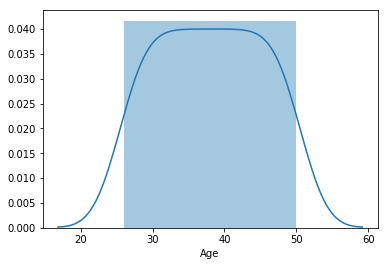

In [119]:
sns.distplot(data['Age'])

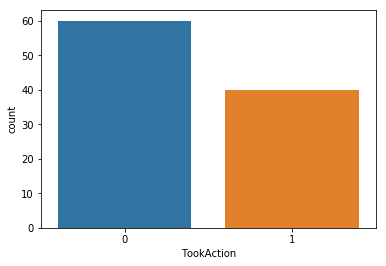

In [120]:
sns.countplot(data['TookAction'])

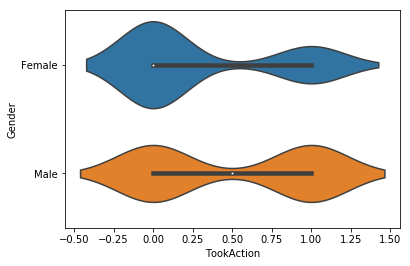

In [121]:
sns.violinplot(x=data['TookAction'],y=data['Gender'])

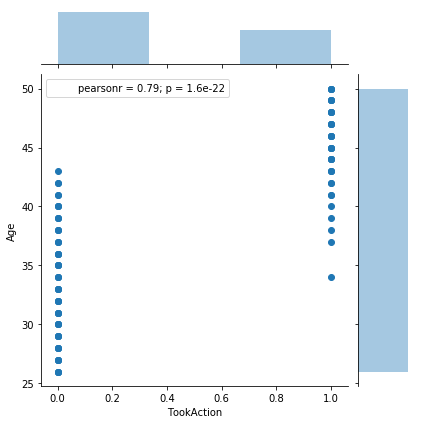

In [122]:
sns.jointplot(x=data['TookAction'],y=data['Age'])

In [123]:
data.head()

,Age,Gender,TookAction
0,38,Female,0
1,32,Female,0
2,46,Male,1
3,34,Male,0
4,40,Male,0


In [124]:
Gender=pd.get_dummies(data['Gender'],drop_first=True)
Gender

,Male
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,1
8,1
9,0


In [125]:
data['Gender_cat']=Gender

In [126]:
data.head()

,Age,Gender,TookAction,Gender_cat
0,38,Female,0,0
1,32,Female,0,0
2,46,Male,1,1
3,34,Male,0,1
4,40,Male,0,1


In [127]:
x=data[['Age','Gender_cat']]
y=data['TookAction']

In [128]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=13)
x_train

,Age,Gender_cat
8,27,1
88,40,1
17,40,0
84,37,1
35,39,0
95,31,1
81,44,0
0,38,0
67,28,1
55,36,1


In [129]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [130]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
x_test

array([[-0.56417829, -1.19522861],
       [ 1.17964552,  0.83666003],
       [ 1.31378581,  0.83666003],
       [ 1.4479261 ,  0.83666003],
       [ 0.91136493, -1.19522861],
       [ 0.37480376, -1.19522861],
       [-1.23487976, -1.19522861],
       [-1.23487976, -1.19522861],
       [ 1.04550522,  0.83666003],
       [-0.56417829,  0.83666003],
       [-1.23487976,  0.83666003],
       [ 0.24066347,  0.83666003],
       [ 0.77722464,  0.83666003],
       [-1.77144093,  0.83666003],
       [-0.02761712,  0.83666003],
       [ 1.04550522, -1.19522861],
       [-0.96659917,  0.83666003],
       [ 0.64308435,  0.83666003],
       [-0.69831858, -1.19522861],
       [-0.56417829,  0.83666003],
       [-0.69831858,  0.83666003],
       [ 0.10652317,  0.83666003],
       [ 0.50894405, -1.19522861],
       [ 0.37480376, -1.19522861],
       [-1.10073946, -1.19522861],
       [-0.2958977 ,  0.83666003],
       [ 1.17964552, -1.19522861],
       [ 1.31378581,  0.83666003],
       [-0.83245888,

In [131]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [132]:
y_predtest=lr.predict(x_test)

In [133]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_predtest)
cr

'             precision    recall  f1-score   support\n\n          0       0.86      1.00      0.92        18\n          1       1.00      0.81      0.90        16\n\navg / total       0.92      0.91      0.91        34\n'

In [134]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predtest)
cm

array([[18,  0],
       [ 3, 13]], dtype=int64)

0.90625


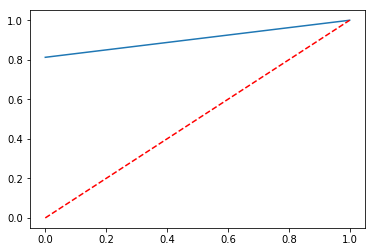

In [135]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predtest)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')